In [1]:
import pandas as pd
import numpy as np

import json

from scripts.utils import SimulateData
from stopsignalmetrics.ssrtmodel import SSRTmodel

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

# SSRT by SSD

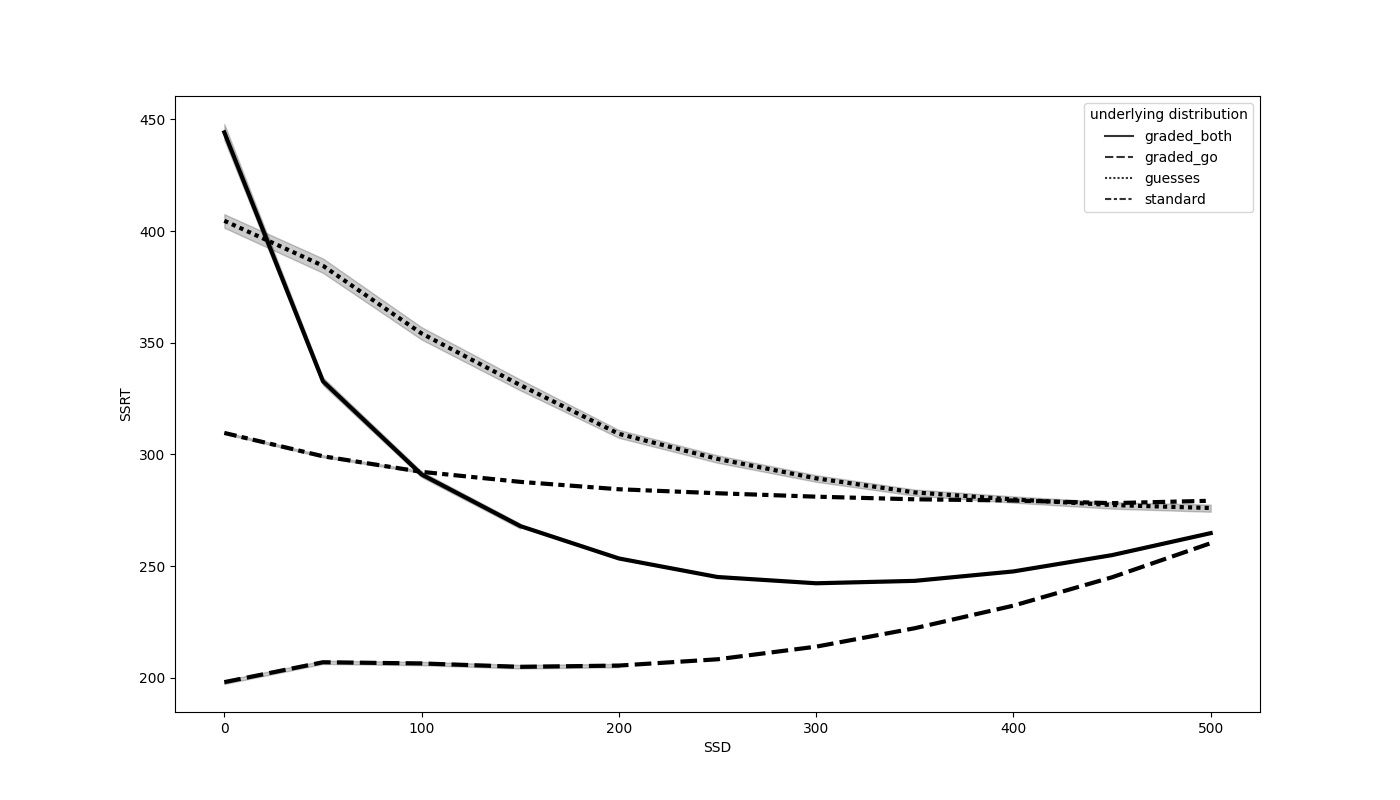

In [2]:
Image('figures/SSRT_by_SSD.png')

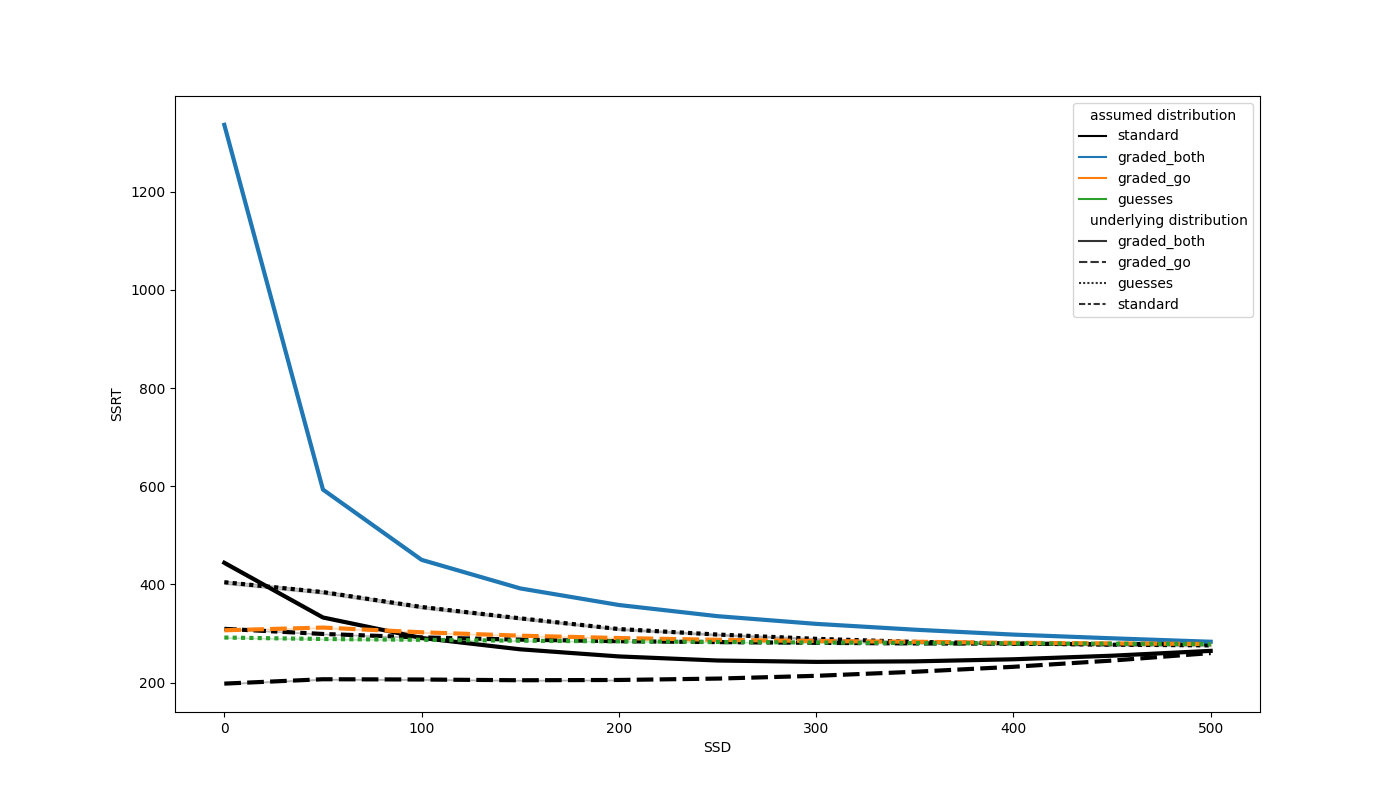

In [3]:
Image('figures/SSRT_by_SSD_supplement.png')

# Inhibition Function

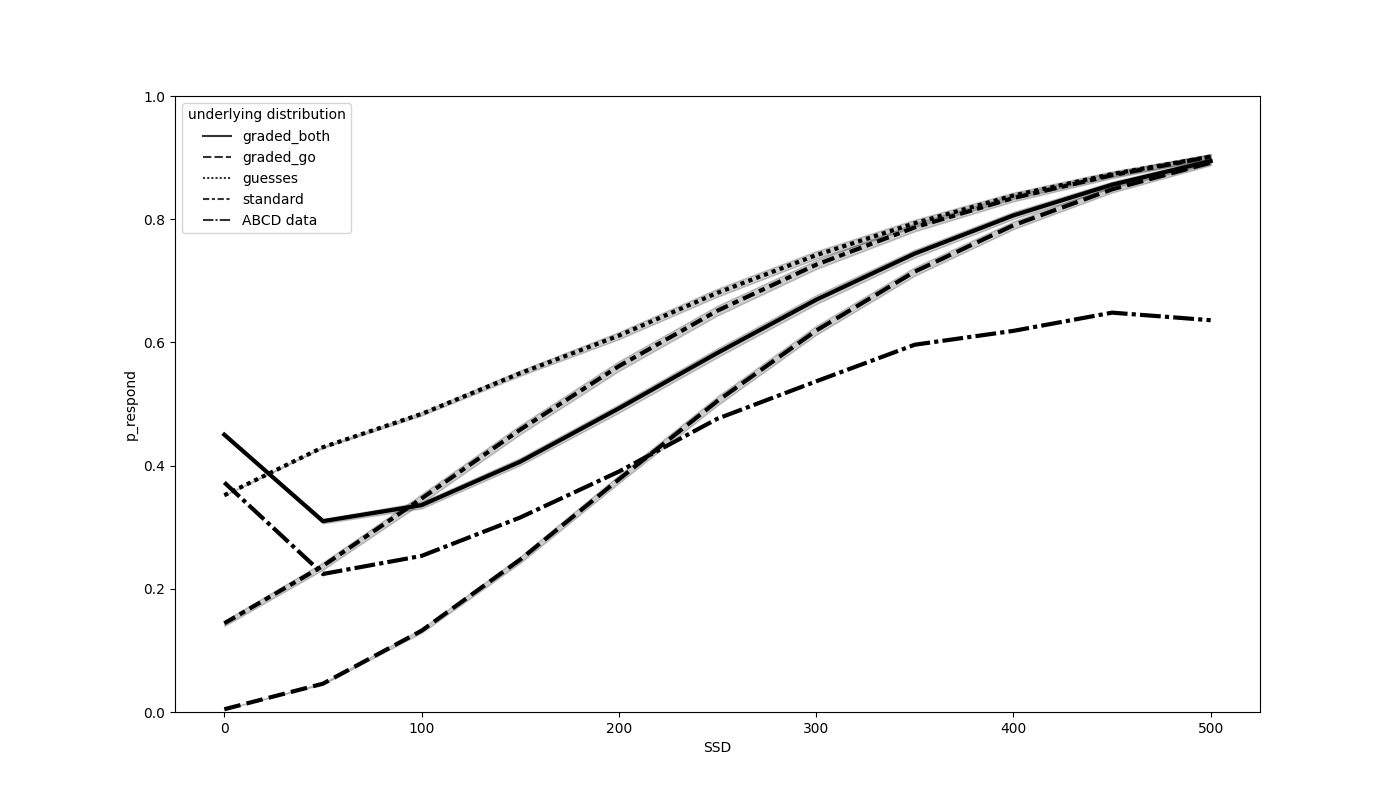

In [4]:
Image('figures/inhibition_function.png')

# Individual Differences

In [5]:
def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

In [6]:
df = pd.read_csv('ssrt_metrics/expected_ssrts.csv', index_col=0)

# reformatting - was multiindex
df.columns = [ f'gen-{gen}_SSRT-{ssrt}' for gen, ssrt in zip(df.loc['underlying distribution', :].values, df.columns)]
df = df.drop(['underlying distribution', 'NARGUID'])

for col in df.columns:
    df[col] = df[col].astype(float)


In [7]:
sim_rt_info = pd.read_csv('simulated_data/sim_rt_meanStd.csv', index_col = 0)

In [8]:
# getting expect SSRTs
mus_path = 'abcd_data/assigned_mus.json'
with open(mus_path, 'r') as f:
    mus_dict = json.load(f)
    
mus_df = pd.DataFrame(mus_dict).T

In [24]:
mus_df

,goRT,go,SSRT,stop
003RTV85,561.562403,0.195480,301.339962,0.397867
007W6H7B,512.717273,0.216115,301.339962,0.397867
00CY2MDM,491.778190,0.226358,301.339962,0.397867
00HEV6HB,535.591873,0.205934,301.339962,0.397867
00J52GPG,437.594534,0.258002,301.339962,0.397867
...,...,...,...,...
vcahyykd,444.617575,0.253410,301.339962,0.397867
ve4u5,541.086485,0.203630,301.339962,0.397867
wzrf2ge6,474.385891,0.235635,301.339962,0.397867
x8k59,475.155825,0.235208,301.339962,0.397867


In [9]:
monster_df = pd.concat([mus_df.add_prefix('expected_'), sim_rt_info, df], 1, sort=True)

In [25]:
monster_df

,expected_goRT,expected_go,expected_SSRT,expected_stop,sim_rt_mean,sim_rt_std,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard.1,gen-guesses_SSRT-standard.2,gen-standard_SSRT-standard.3,...,gen-guesses_SSRT-graded_go.2,gen-standard_SSRT-graded_go.3,gen-graded_both_SSRT-graded_both,gen-graded_go_SSRT-graded_both.1,gen-guesses_SSRT-graded_both.2,gen-standard_SSRT-graded_both.3,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed.1,gen-guesses_SSRT-fixed.2,gen-standard_SSRT-fixed.3
003RTV85,561.562403,0.195480,301.339962,0.397867,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007W6H7B,512.717273,0.216115,301.339962,0.397867,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00CY2MDM,491.778190,0.226358,301.339962,0.397867,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00HEV6HB,535.591873,0.205934,301.339962,0.397867,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00J52GPG,437.594534,0.258002,301.339962,0.397867,537.521,216.061634,317.766667,183.116667,330.033333,294.7,...,806.483333,639.316667,838.583333,284.45,806.483333,639.316667,253.0,194.0,289.0,275.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vcahyykd,444.617575,0.253410,301.339962,0.397867,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ve4u5,541.086485,0.203630,301.339962,0.397867,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wzrf2ge6,474.385891,0.235635,301.339962,0.397867,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x8k59,475.155825,0.235208,301.339962,0.397867,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
def make_plot_square(ax):
    lowx, highx = ax.get_xlim()
    lowy, highy = ax.get_ylim()
    low = min(lowx, lowy)
    high = max(highx, highy)
    ax.set_xlim((low, high))
    ax.set_ylim((low, high))
    return ax

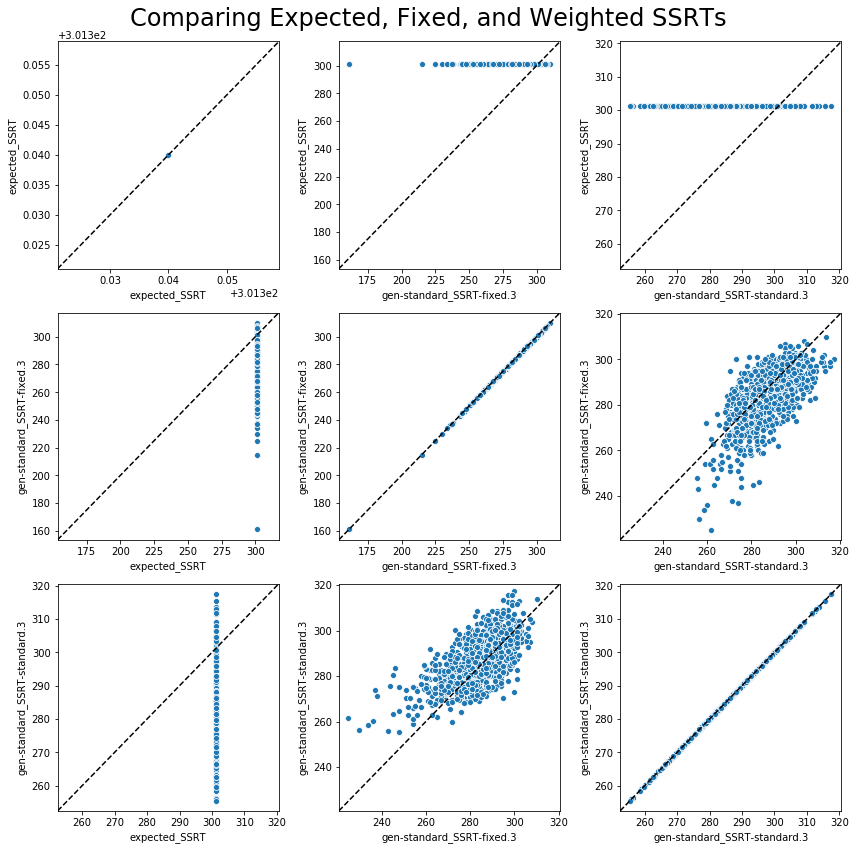

In [35]:
fig, axes = plt.subplots(3, 3, figsize=(12,12))

columns = ['expected_SSRT', 'gen-standard_SSRT-fixed.3', 'gen-standard_SSRT-standard.3']
for idx,coli in enumerate(columns):
    for jdx, colj in enumerate(columns):
        ax = sns.scatterplot(x=colj, y=coli, data=monster_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Expected, Fixed, and Weighted SSRTs', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [11]:
monster_df[columns].corr(method='spearman')

,expected_SSRT,gen-standard_SSRT-fixed.3,gen-standard_SSRT-standard.3
expected_SSRT,NaN,NaN,NaN
gen-standard_SSRT-fixed.3,NaN,1.00000,0.62312
gen-standard_SSRT-standard.3,NaN,0.62312,1.00000


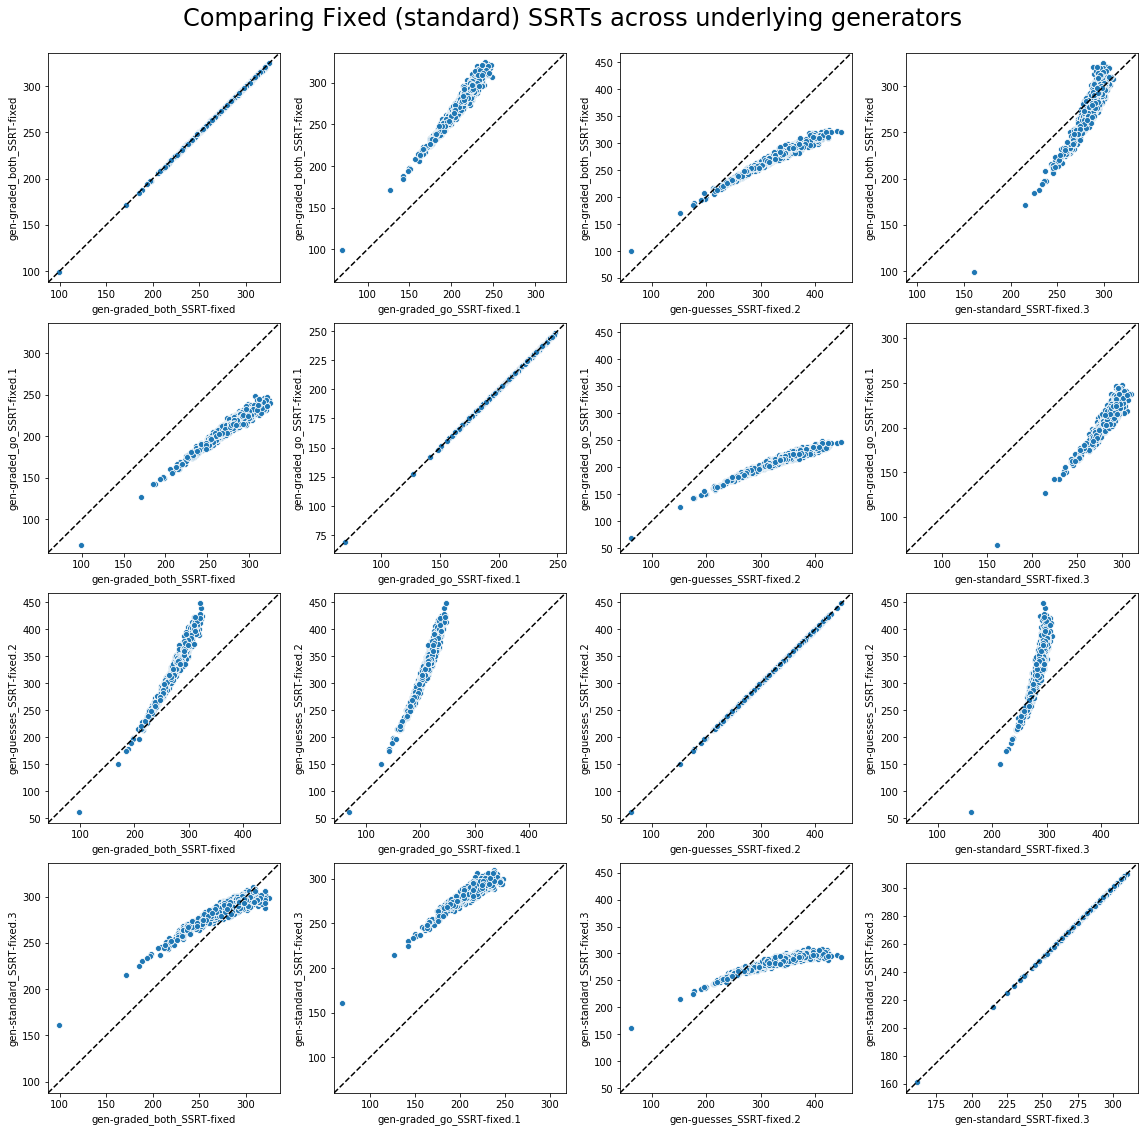

In [36]:
curr_df = monster_df.filter(regex='fixed')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Fixed (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [13]:
curr_df.corr(method='spearman')

,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed.1,gen-guesses_SSRT-fixed.2,gen-standard_SSRT-fixed.3
gen-graded_both_SSRT-fixed,1.000000,0.963210,0.978713,0.902336
gen-graded_go_SSRT-fixed.1,0.963210,1.000000,0.970886,0.893325
gen-guesses_SSRT-fixed.2,0.978713,0.970886,1.000000,0.911637
gen-standard_SSRT-fixed.3,0.902336,0.893325,0.911637,1.000000


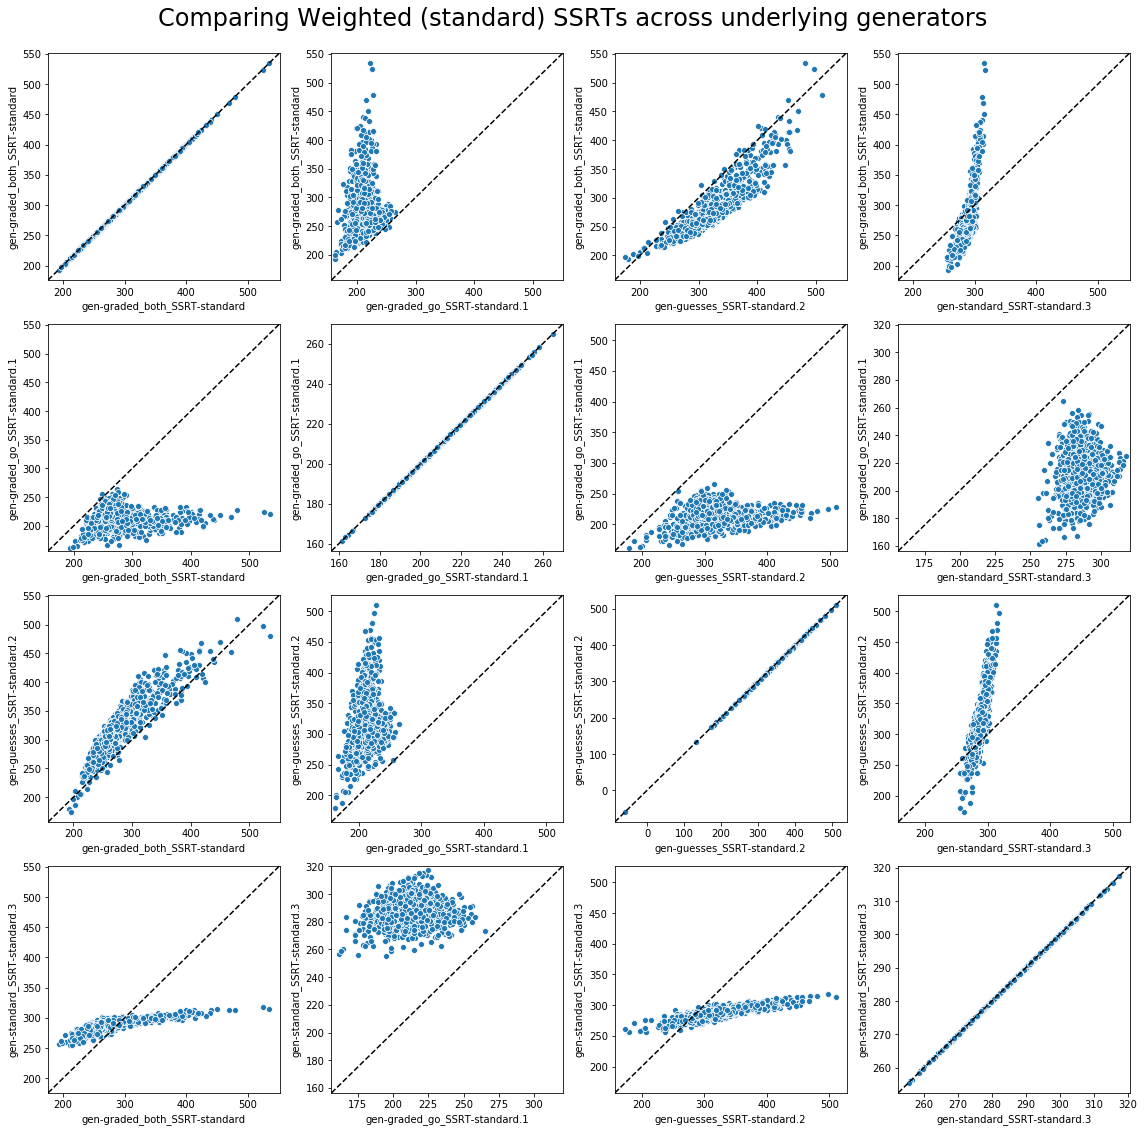

In [37]:
curr_df = monster_df.filter(regex='SSRT-standard')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Weighted (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [15]:
curr_df.corr(method='spearman')

,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard.1,gen-guesses_SSRT-standard.2,gen-standard_SSRT-standard.3
gen-graded_both_SSRT-standard,1.000000,0.104702,0.908438,0.828703
gen-graded_go_SSRT-standard.1,0.104702,1.000000,0.187480,0.108633
gen-guesses_SSRT-standard.2,0.908438,0.187480,1.000000,0.838255
gen-standard_SSRT-standard.3,0.828703,0.108633,0.838255,1.000000


In [16]:
main_cols = ['expected_SSRT',
             'gen-graded_both_SSRT-standard',
             'gen-graded_go_SSRT-standard.1',
             'gen-guesses_SSRT-standard.2',
             'gen-standard_SSRT-standard.3',
             'gen-graded_both_SSRT-fixed',
             'gen-graded_go_SSRT-fixed.1',
             'gen-guesses_SSRT-fixed.2',
             'gen-standard_SSRT-fixed.3']
monster_df[main_cols].describe()

,expected_SSRT,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard.1,gen-guesses_SSRT-standard.2,gen-standard_SSRT-standard.3,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed.1,gen-guesses_SSRT-fixed.2,gen-standard_SSRT-fixed.3
count,8.238000e+03,1150.000000,1148.000000,1152.000000,1148.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,3.013400e+02,276.824413,213.664802,318.710884,286.965848,276.074653,211.424479,331.848090,284.773438
std,8.299643e-12,41.436175,15.013274,45.043713,9.294424,22.520491,16.825507,42.986818,12.086133
min,3.013400e+02,193.150000,161.550000,-58.533333,255.566667,99.000000,69.000000,61.000000,161.000000
25%,3.013400e+02,251.791667,204.725000,293.005014,281.370833,263.750000,203.000000,307.000000,279.000000
50%,3.013400e+02,265.658333,213.869231,313.200000,287.083333,279.000000,214.000000,336.000000,287.000000
75%,3.013400e+02,290.104167,222.999788,341.291667,292.820833,292.000000,223.000000,361.000000,293.000000
max,3.013400e+02,534.800000,264.888889,510.400000,317.500000,325.000000,248.000000,448.000000,310.000000


In [17]:
df.corr(method='spearman')

,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard.1,gen-guesses_SSRT-standard.2,gen-standard_SSRT-standard.3,gen-graded_both_SSRT-guesses,gen-graded_go_SSRT-guesses.1,gen-guesses_SSRT-guesses.2,gen-standard_SSRT-guesses.3,gen-graded_both_SSRT-graded_go,gen-graded_go_SSRT-graded_go.1,gen-guesses_SSRT-graded_go.2,gen-standard_SSRT-graded_go.3,gen-graded_both_SSRT-graded_both,gen-graded_go_SSRT-graded_both.1,gen-guesses_SSRT-graded_both.2,gen-standard_SSRT-graded_both.3,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed.1,gen-guesses_SSRT-fixed.2,gen-standard_SSRT-fixed.3
gen-graded_both_SSRT-standard,1.000000,0.104702,0.908438,0.828703,0.092757,-0.784081,0.678396,-0.891394,0.786002,0.795434,0.836800,0.562843,0.786002,0.795434,0.836800,0.562843,0.569410,0.551585,0.565001,0.527238
gen-graded_go_SSRT-standard.1,0.104702,1.000000,0.187480,0.108633,-0.250440,0.420147,0.119742,-0.153079,-0.418823,-0.092302,-0.335139,-0.683499,-0.418823,-0.092302,-0.335139,-0.683499,0.712097,0.740640,0.716912,0.657818
gen-guesses_SSRT-standard.2,0.908438,0.187480,1.000000,0.838255,-0.229402,-0.755832,0.778157,-0.967255,0.697838,0.769586,0.787021,0.467781,0.697838,0.769586,0.787021,0.467781,0.702533,0.697327,0.719596,0.664010
gen-standard_SSRT-standard.3,0.828703,0.108633,0.838255,1.000000,-0.059321,-0.697399,0.611882,-0.733987,0.654935,0.694246,0.722093,0.489618,0.654935,0.694246,0.722093,0.489618,0.541739,0.535955,0.554603,0.623120
gen-graded_both_SSRT-guesses,0.092757,-0.250440,-0.229402,-0.059321,1.000000,0.015717,-0.128412,0.223472,0.133552,-0.054174,0.027427,0.211889,0.133552,-0.054174,0.027427,0.211889,-0.395248,-0.408089,-0.421204,-0.386011
gen-graded_go_SSRT-guesses.1,-0.784081,0.420147,-0.755832,-0.697399,0.015717,1.000000,-0.564791,0.761561,-0.960283,-0.803764,-0.980844,-0.902043,-0.960283,-0.803764,-0.980844,-0.902043,-0.171302,-0.157703,-0.176477,-0.162638
gen-guesses_SSRT-guesses.2,0.678396,0.119742,0.778157,0.611882,-0.128412,-0.564791,1.000000,-0.686438,0.521882,0.593944,0.601286,0.354258,0.521882,0.593944,0.601286,0.354258,0.500970,0.503682,0.543348,0.477194
gen-standard_SSRT-guesses.3,-0.891394,-0.153079,-0.967255,-0.733987,0.223472,0.761561,-0.686438,1.000000,-0.704820,-0.756993,-0.786271,-0.478004,-0.704820,-0.756993,-0.786271,-0.478004,-0.650901,-0.645079,-0.659716,-0.582775
gen-graded_both_SSRT-graded_go,0.786002,-0.418823,0.697838,0.654935,0.133552,-0.960283,0.521882,-0.704820,1.000000,0.806652,0.980267,0.927724,1.000000,0.806652,0.980267,0.927724,0.114231,0.109168,0.117834,0.108309
gen-graded_go_SSRT-graded_go.1,0.795434,-0.092302,0.769586,0.694246,-0.054174,-0.803764,0.593944,-0.756993,0.806652,1.000000,0.850086,0.680956,0.806652,1.000000,0.850086,0.680956,0.361232,0.368076,0.364135,0.333170


# testing a subject to investigate fixed SSD - not finished yet

In [18]:
def generate_out_df_simple(data):
    info = []
    ssrtmodel = SSRTmodel(model='replacement')
    goRTs = data.loc[data.goRT.notnull(), 'goRT'].values
    SSDs = [i for i in data.SSD.unique() if i == i]
    SSDs.sort()

    for SSD in SSDs:
        curr_df = data.query(
            "condition=='go' | (condition=='stop' and SSD == %s)" % SSD
            )
        curr_metrics = ssrtmodel.fit_transform(curr_df)
        curr_info = [v for v in curr_metrics.values()] +\
                    [SSD]
        info.append(curr_info)
        
    cols = [k for k in curr_metrics.keys()] +\
           ['SSD']
    # get for metrics using whole simulated data
    curr_metrics = SSRTmodel(model='replacement').fit_transform(data)
    curr_info = [v for v in curr_metrics.values()] +\
                [-np.inf]
    info.append(curr_info)

    return pd.DataFrame(
        info,
        columns=cols)

In [19]:
simulator_dict = {
    'standard': SimulateData(),
}

ssrtmodel = SSRTmodel(model='replacement')

# set up shared params
SSDs = np.arange(0, 550, 50)
params = {
    'n_trials_stop': 3000,
    'n_trials_go': 10000,
    'SSDs': SSDs,
}

# SIMULATE INDIVIDUALS
issue_subs = []
for sub in monster_df.loc[monster_df['gen-graded_both_SSRT-standard'].notnull(), :].index[9:10]:
    params['mu_go'] = mus_dict[sub]['go']
    params['mu_stop'] = mus_dict[sub]['stop']

    for sim_key in simulator_dict:
        print('mu_stop', params['mu_stop'])
        data = simulator_dict[sim_key].simulate(params)
        print('expected', monster_df.loc[sub, 'expected_SSRT'])
        print('mu_stop', params['mu_stop'])
        print('calculated', ssrtmodel.fit_transform(data)['SSRT'])
        print('*'*40)
        
        
        

mu_stop 0.3978674912193927
expected 301.33996168804316
mu_stop 0.3978674912193927
calculated 248.0
****************************************


In [20]:
ssrt_by_ssd_df = generate_out_df_simple(data)
ssrt_by_ssd_df

,SSRT,mean_SSD,p_respond,max_RT,mean_go_RT,mean_stopfail_RT,omission_count,omission_rate,go_acc,stopfail_acc,SSD
0,309.0,0.0,0.149333,1691.0,470.8368,301.857143,0,0.0,NaN,NaN,0.0
1,297.0,50.0,0.249667,1691.0,470.8368,318.246996,0,0.0,NaN,NaN,50.0
2,289.0,100.0,0.369333,1691.0,470.8368,333.241877,0,0.0,NaN,NaN,100.0
3,286.0,150.0,0.494667,1691.0,470.8368,352.463612,0,0.0,NaN,NaN,150.0
4,293.0,200.0,0.624667,1691.0,470.8368,370.523479,0,0.0,NaN,NaN,200.0
5,283.0,250.0,0.706333,1691.0,470.8368,384.811704,0,0.0,NaN,NaN,250.0
6,285.0,300.0,0.788667,1691.0,470.8368,404.344041,0,0.0,NaN,NaN,300.0
7,286.0,350.0,0.846000,1691.0,470.8368,413.219070,0,0.0,NaN,NaN,350.0
8,279.0,400.0,0.886667,1691.0,470.8368,428.257895,0,0.0,NaN,NaN,400.0
9,293.0,450.0,0.928000,1691.0,470.8368,437.192529,0,0.0,NaN,NaN,450.0


In [21]:
generate_out_df_simple(data.loc[data.SSD.isin(np.arange(50, 300, 50)) | (data.condition=='go')])

,SSRT,mean_SSD,p_respond,max_RT,mean_go_RT,mean_stopfail_RT,omission_count,omission_rate,go_acc,stopfail_acc,SSD
0,297.0,50.0,0.249667,1691.0,470.8368,318.246996,0,0.0,NaN,NaN,50.0
1,289.0,100.0,0.369333,1691.0,470.8368,333.241877,0,0.0,NaN,NaN,100.0
2,286.0,150.0,0.494667,1691.0,470.8368,352.463612,0,0.0,NaN,NaN,150.0
3,293.0,200.0,0.624667,1691.0,470.8368,370.523479,0,0.0,NaN,NaN,200.0
4,283.0,250.0,0.706333,1691.0,470.8368,384.811704,0,0.0,NaN,NaN,250.0
5,283.0,150.0,0.488933,1691.0,470.8368,360.026179,0,0.0,NaN,NaN,-inf


# Plot graded Mu Go function

In [22]:
SSDs = np.arange(0,650, 5)

simulator = SimulateData()
mu_gos = [[i, simulator._log_grade_mu(1, i)] for i in SSDs]

/Users/henrymj/Documents/ABCD_simulations/scripts/utils.py:285: RuntimeWarning: divide by zero encountered in log
  return self._at_least_0((np.log(SSD/max_SSD)/4+1) * mu_go)


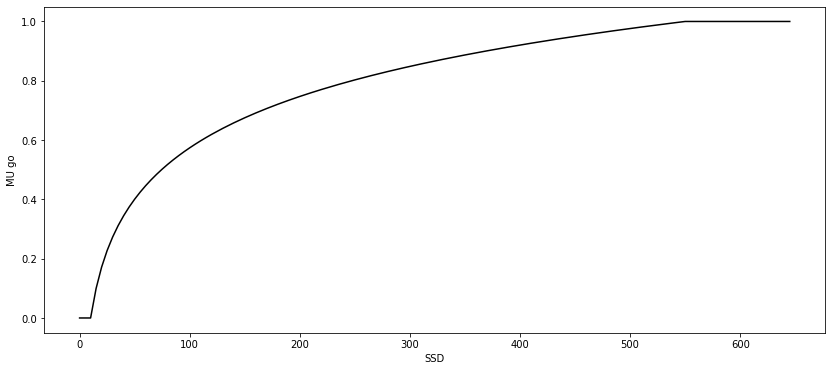

In [23]:
fig,ax = plt.subplots(1,1, figsize=(14, 6))

_ = sns.lineplot(x='SSD', y='MU go', color='k', data=pd.DataFrame(mu_gos, columns=['SSD', 'MU go']))
plt.savefig('figures/graded_mu_go_function.png')